# دسته بندی رفتار مشتریان بانک

### هدف این هستش با توجه به داده های گذشته بانک که مربوط به رفتار مشتریان و ویژگی های آنان در پرداخت وام است، مدلی برای بانک ساخته بشه.
### بانک ویژگی های رفتاری مشتریان رو ازشون بگیره و بده به مدل و مدل به  بانک در تصمیم گیری برای پرداخت وام به مشتری جدید کمک شایانی انجام بده

In [ ]:
# دانلود دیتا ست

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

In [ ]:
!unzip -o -q bank-additional.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)
#Data transformation
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
#Classificators
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
# warnings deactivate
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# وارد کردن دیتاست و انجام مراحل ابتدایی

In [ ]:
df = pd.read_csv("bank-additional/bank-additional-full.csv", sep=";")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
# شناسایی متغیرهای که آبجکت هستند ولی  باید کتگوریکال باشند
col_cat = df.select_dtypes("O").columns

In [ ]:
col_cat.shape

In [ ]:
# واسه این کار اول شناساییشون میکنیم، میبینیم که 11 متغیر داریم که باید کتگوریکال بشن
# حالا باید تایپشون رو به کتگوری تغییر میدیم

In [ ]:
df.loc[:,col_cat] = df[col_cat].astype("category")

In [ ]:
df.info()

In [ ]:
# حالا میتونیم ببینیم که تایپشون تغییر پیدا کرده

In [ ]:
# همچنین میبینم که وقتی از یه ستون یونیک میگیریم زیرش مینویسه که چند دسته شده
# مثلا اینجا گفته که شغل 12 ردیف دسته بندی شده

In [ ]:
df['job'].unique()

In [ ]:
df['job'].value_counts()

In [ ]:
# خب وای متغیر هدف ماست و میخاهیم ببینیم بر اساس داده های گذشته به کیا میتونیم وام بدیم و به کیا نباید وام بدیم 

In [ ]:
df.y.value_counts()

In [ ]:
# خب حالا برای اینکه بتونیم متغیرهای کتگوریکال رو به مدل بدیم، باید اونا رو به فلوت یا اینتیجر تبدیل کنیم
# اما اول متغیرهای مستقل و متعیر وابسته رو جدا میکنیم
X = df.iloc[:, :-1] 
y = df.iloc[:,-1]

In [ ]:
col_cat

In [ ]:
# Encoding and Normalization
# انکودینگ و نرمال سازی

In [ ]:
# ببین کار خوبی که کردیم اینه که نیومدیم یکی یکی اینکارا رو انجام بدیم
# همه رو ریختیم توی یه لیست بهش اسم دادیم و بعد عمه رو یهویی انکینگ میکنیم
col_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']

In [ ]:
oe = OrdinalEncoder()
X_cat_enc = oe.fit_transform(X[col_cat])

In [ ]:
X_cat_enc

In [ ]:
# دوباره به دیتافریم تبدیلش میکنیم
# چرا؟
# چون هنوز کار داریم و باید اینو بچسبونیم به دیتافریم اصلی و اگه فرمتش دیتا فریم نباشه به راحتی نمیشه این کارو انجام داد

In [ ]:
X_cat_enc = pd.DataFrame(X_cat_enc)
X_cat_enc.columns = col_cat

In [ ]:
X_cat_enc

##### خب حالا که متغیرهای کتگوریمون رو مدیریت کردیم و دیگه کاری باهاشون نداریم
##### دقت کنیم که چون اینا کتگوری بودن و انکودینگ شدن دیگه نیازی به اسکیلینگ،نرنمال سازی و استاندارد سازی ندارن
## اسکیلینگ برای متغیرهای عددی و   نومریکال هتسش
## انکودینگ برای متغیرهای دسته ای و کتگوریکال هستش

In [ ]:
df

In [ ]:
# شناسایی متغیرهای نومریکال
col_num = df.select_dtypes([int,float]).columns

In [ ]:
col_num

In [ ]:
# اسکیلینگ و مقیاس بندی متغیرهای عددی توسط مین_مکس

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_num_enc = scaler.fit_transform(X[col_num])

In [ ]:
X_num_enc

In [ ]:
# تبدیل ماتریس بدست آمده به دیتافریم چون میخواهیم به دیتافریم قبلی اضافش کنیم

In [ ]:
X_num_enc = pd.DataFrame(X_num_enc)
X_num_enc.columns=col_num
X_num_enc

In [ ]:
# اضاف کردن دوتا دیتا فریم قبلی که ساختیم
x_enc = pd.concat([X_cat_enc,X_num_enc], axis=1)

In [ ]:
x_enc

In [ ]:
#  حالا   متغیر هدف یا همون متغیر وابسته ما چون کتگوریکال هست باید انکدینگ انجام بدیم
le = LabelEncoder()
y_enc = le.fit_transform(y)
y_enc = pd.Series(y_enc)
y_enc.columns = y.name

In [ ]:
y_enc

In [ ]:
y

In [ ]:
# همانطور که میبنیم مقدار نه به صفر و مقدار بله یه یک تغیر پیدا کرد

## Features Selection      انتخاب ویژگی
## Features importance   اهمیت ویژگی


### انتخاب ویژگی
 فرآیندی است که در آن به طور خودکار یا دستی ویژگی هایی را انتخاب می کنیم که بیشترین کمک را به متغیر هدف ما دارند
 مثلا در دیتاست آیریس اگه دستی دو تا ویژگی رو انتخاب کنیم انتخاب ویژگی کردیم
***********************************************************************************************
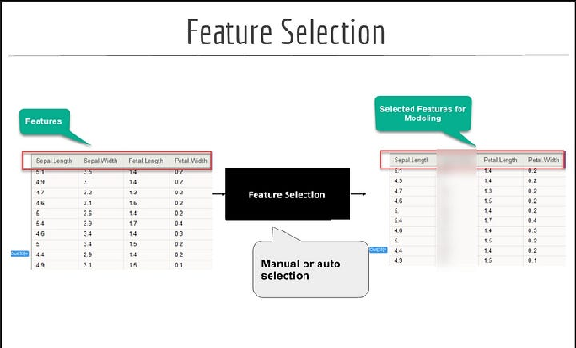

### اهمیت ویژگی
به تکنیک‌هایی اشاره دارد که بر اساس میزان مفید بودن ویژگی‌های ورودی در پیش‌بینی متغیرهای هدف، امتیازی را به آن اختصاص می‌دهند
مثلا در دیتاست آیریس با استفاده از مدل اهمیت ویژگی ها رو به تصویر کشیدیم
.
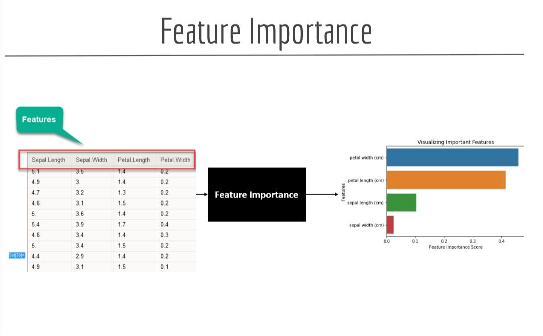

### به طور خلاصه، امتیازی که از اهمیت ویژگی بدست میاریم، برای انجام انتخاب ویژگی استفاده می کنیم

### حالا چرا این دو تا برای ما مهم هستن؟
   ###                       نفرین ابعاد  ،curse of dimensionality : دلیل اصلی مسئله ای هستش به نام 
#### وقتی تعداد ویژگی ما در برابر تعداد ردیف ها یا مشاهداتمون زیاد بشه، همه ی مدلها کارایی ندارن و به مشکل برمیخوریم به این مسئله نفرین ابعاد میگن

In [ ]:
# انخاب ویژگی
# همانگونه که می دانیم همه ی ویژگی ها اهمیت و اطلاعات یکسانی برای دسته بندی ندارن،
# بطور کلی از دو روش میتونیم برای انخاب ویژگی استفاده کنیم
    # * Chi-Squared Statistic.
    # * Mutual Information Statistic.
# به هر کدام نگاهی میندازیم

In [ ]:
# Chi-Squared Statistic.
# آزمون فرضیه آماری کای_اسکوئر_پیرسون نمونه ای از آزمون استقلال بین متغیرهای طبقه بندی است 
# از نتایج این آزمون می توان برای انتخاب ویژگی استفاده کرد، که در آن ویژگیهایی که مستقل از متغیر هدف هستند را می توان از مجموعه داده حذف کرد

# با استفاده از سایکیتلرن میشه کای اسکوئر رو بکار برد.
#  میشه تعداد ویژگی مد نظر رو بدست آورد مثلا تعداد "کا" SelectKBest با  استفاده از تابع

In [ ]:
# حالا ما اینجا میخاهیم 10 تا ویژگی رو ا بین 20 ویژگی انتخاب کنیم
bestFeatures = SelectKBest( score_func= chi2, k= 10)
fit = bestFeatures.fit(x_enc, y_enc)
dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
featureScores = pd.concat([dfcolumns, dfscore],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

In [ ]:
#Mutual Information Statistic
# در این روش از اطلاعات مشترک بین دو متغیر استفاده میشه

In [ ]:
mu_inf = SelectKBest(score_func=mutual_info_classif, k=10)
fit_m = mu_inf.fit(x_enc, y_enc)
dfscore_m = pd.DataFrame(fit_m.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
featureScores_m = pd.concat([dfcolumns, dfscore_m],axis=1)
featureScores_m.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores_m.nlargest(10,'Score'))  #print 10 best features

In [ ]:
# مشاهدات
    #* همانگونه که در بالا دیده میشه دو مدل نتایج متفاوتی رو دارن

In [ ]:
# اهمیت ویژگی
#  میتونیم اهمیت ویژگی هر یک از ویژگی های دیتافریم خودمون رو با استفاده از   مدل طبقه بندی که میخاهیم استفاده میکنیم بدست بیاریم
# اهمیت ویژگی  امتیازی برای هر ویژگی میده، هر چه امتیاز بیشتر باشه، ویژگی نسبت به متغیر خروجی ما مهمتر و مربوطتره 
# استفاده میکنیم تا اهمیت هر ویژگی رو بدست بیاریم Extra Tree  مثلا اینجا از طبقه بند یا کلاسیفایر 

In [ ]:
# اول باید مدل رو ایجاد و بعد فیت کنیم 

In [ ]:
model = ExtraTreesClassifier()
model.fit(x_enc,y_enc)

In [ ]:
# از دستور زیر استفاده میکنم تا اهمیت ویژگی ها رو ببینیم
print(model.feature_importances_)

In [ ]:
feat_import = pd.Series(model.feature_importances_ , index=x_enc.columns)

In [ ]:
feat_import.sort_values(ascending=False)

In [ ]:
feat_import.sort_values(ascending=False).nlargest(10).plot(kind="barh")

# Correlation Matrix with Heatmap
# ماتریس همسبتگی با نمودار حرارتی

 ##### همبستگی بیان می کند که چگونه ویژگی ها با یکدیگر مرتبط هستند
  ***************************************
##### همبستگی می‌تواند مثبت باشد (افزایش یک مقدار ویژگی، مقدار متغیر دیگر را افزایش می‌دهد)
##### یا منفی (افزایش یک مقدار ویژگی، ارزش متغیر دیگر را کاهش می‌دهد
*************************************
  ### نمودار هیتمپ تشخیص اینکه کدام ویژگی بیشتر به دیگری مرتبط است را آسان می‌کند.
  

In [ ]:
corrmat = x_enc.corr()
top_corr_features = corrmat.index

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [ ]:
##'euribor3m'، 'emp.var.rate'، 'nr.employed'
## همانطور که می بینید فیلدهای بالا کاملاً با یکدیگر مرتبط هستند.
## به این معنی که دو تا از آنها باید از محاسبه حذف شوند زیرا وابستگی های خطی بین آنها وجود دارد.
## اگر یکی از آنها را بشناسیم می توانیم به راحتی دو مورد دیگر را محاسبه کنیم. بیایید دو تا ویژگی زیر رو حذف کنیم
## 'emp.var.rate' و 'nr.employed'

In [ ]:
col = x_enc.columns
col

In [ ]:
col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m']

In [ ]:
x_enc = x_enc[col]

# مدلهای طبقه بندی و کلاسیفایرز

In [ ]:
## اولین کاری که باید انجام بدیم تقسیم بندی داده ها به ترین و تست است

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_enc, y_enc, test_size=0.33 , random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

## مدل
## Extra Trees Classifier

In [ ]:
etc = ExtraTreesClassifier()
model = etc.fit(X_train, y_train)
y_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_hat)

In [ ]:
print('Accuracy: %.2f' % (acc*100))

## مدل
## Logistic regression

In [ ]:
lr = LogisticRegression(solver='lbfgs')
model1 = lr.fit(X_train, y_train)
y_hat1 = model1.predict(X_test)
acc1 = accuracy_score(y_test, y_hat1)

In [ ]:
print('Accuracy: %.2f' % (acc1*100))

## مدل
## Decision tree

In [ ]:
dt = DecisionTreeClassifier()
model2 = dt.fit(X_train, y_train)
y_hat2 = model2.predict(X_test)
acc2 = accuracy_score(y_test, y_hat2)
print('Accuracy: %.2f' % (acc2*100))

In [ ]:
print("Feature Importance: ", model2.feature_importances_)

In [ ]:
feat_importances = pd.Series(model2.feature_importances_, index=x_enc.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# حالا بریم مدل رو بر اساس با اهمیت ترین ویژگی ها دوباره بازنویسی کنیم

In [ ]:
X_train_dt = X_train[col]
X_test_dt = X_test[col]
model3 = dt.fit(X_train_dt, y_train)
y_hat_dt = model3.predict(X_test_dt)
acc_dt = accuracy_score(y_test, y_hat_dt)
print("Accuracy:%.2f" % (acc_dt*100) )

In [ ]:
# مشاهدات
# همانگونه که میبینیم نتایج مدل خیلی فرقی نکرد و کمی بدتر شد، دلیلش هم اینه ما از همه ویژگی ها استفاده نکردیم

In [ ]:
# مصور کردن درخت تصمیم
# چندین راه برای این مصورسازی هست از جمله
# Text visualization

In [ ]:
text_tree = tree.export_text(model3)
print(text_tree)

In [ ]:
# ذخیره کردن فایل بالا بصورت زیر

In [ ]:
with open("decision_tree.log", "w") as fout:
    fout.write(text_tree)

## مصورسازی درخت

In [ ]:
# از دو دروش میتونیم درخت تصمیم رو بتصویر بکشیم
# روش سریعتر اینه که از کتابخانه زیر استفاده کنیم
# python-graphviz

In [ ]:
#!pip install python-graphviz

In [ ]:
import graphviz
dot_data = tree.export_graphviz(model3,
                               feature_names=col,
                               class_names=y.unique(),
                                filled=True
                               )

In [ ]:
# بعد اینطوری به تصویر میکشیمش

In [ ]:
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
# اینطوری توی فایل ارئه یا تحویل داده میشه

In [ ]:
graph.render("decision_tree_graphivz")